In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [3]:
img_train.shape

(60000, 28, 28, 1)

In [4]:
label_train.shape

(60000,)

In [5]:
img_test.shape

(10000, 28, 28, 1)

In [6]:
label_test.shape

(10000,)

In [7]:
img_train = np.reshape(img_train, newshape=(60000, 28, 28))
img_test = np.reshape(img_test, newshape=(10000, 28, 28))

In [8]:
img_train[14, 14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 180,
       253, 253, 253, 253, 253, 170,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [9]:
img_train = img_train/255.
img_test = img_test/255.

In [10]:
np.unique(label_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
import random
def show_random(images, labels):
  plt.figure(figsize=(10, 7))
  rdm = random.randint(0, images.shape[0])
  plt.imshow(images[rdm])
  plt.title(f"{labels[rdm]}")
  plt.axis(False)
  plt.show()

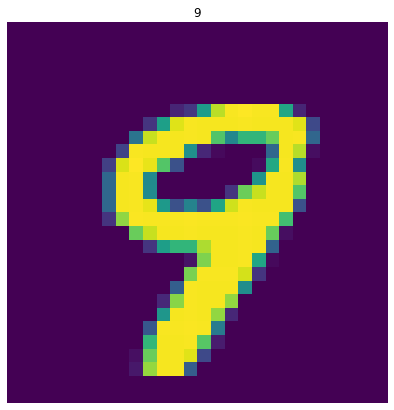

In [12]:
show_random(img_train, label_train)

In [13]:
EPOCHS = 10
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_1 = model_1.fit(img_train, label_train,
            epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 1.0130 - accuracy: 0.6749
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5504 - accuracy: 0.8418
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8613
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4640 - accuracy: 0.8684
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4474 - accuracy: 0.8737
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4373 - accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4292 - accuracy: 0.8793
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4228 - accuracy: 0.8803
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8818
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.413

In [14]:
def plot_history_curve(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  epochs = np.arange(0, len(loss))
  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.title("EPOCHS - LOSS")
  plt.plot(epochs, loss)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.title("EPOCHS - ACCURACY")
  plt.plot(epochs, accuracy)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

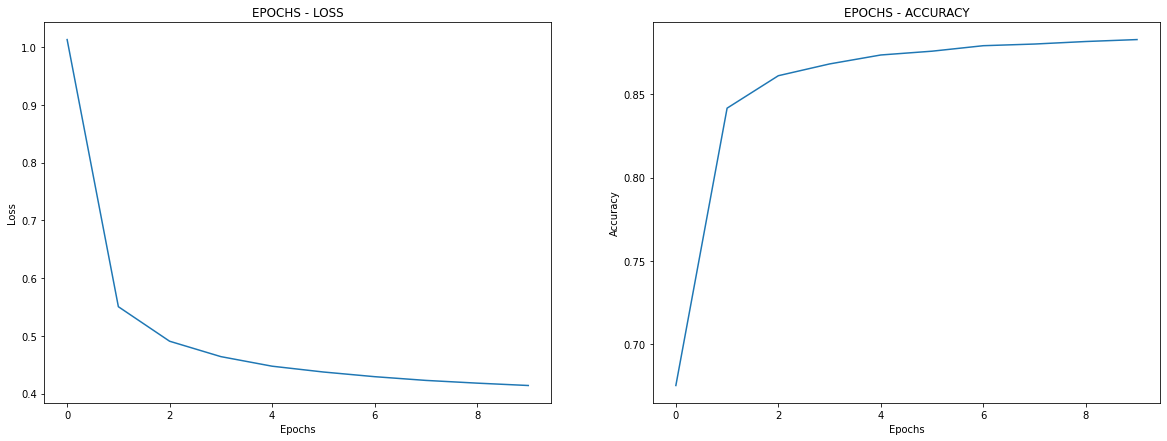

In [15]:
plot_history_curve(history_1)

In [16]:
model_1.evaluate(img_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8814


[0.4234296381473541, 0.8813999891281128]

In [19]:
from sklearn.metrics import confusion_matrix
img_probs = model_1.predict(img_test)
img_preds = img_probs.argmax(axis=1)
img_preds

array([2, 0, 4, ..., 8, 0, 5])

In [21]:
label_test

array([2, 0, 4, ..., 8, 0, 5])

In [62]:
cm = confusion_matrix(label_test, img_preds)
cm

array([[ 946,    0,    3,    1,    5,   12,    7,    6,    0,    0],
       [   0, 1106,    9,    3,    1,    1,    1,    2,   11,    1],
       [  19,   29,  876,   33,   11,    6,   21,    9,   26,    2],
       [   5,    2,   24,  816,    0,   95,    0,   19,   37,   12],
       [   6,    2,    3,    0,  888,    2,   11,    5,   10,   55],
       [  21,    1,   11,   27,   17,  757,   11,    5,   27,   15],
       [  35,    2,    8,    0,   14,   21,  871,    0,    7,    0],
       [   3,   26,    8,   18,    7,    2,    0,  907,    1,   56],
       [   4,   19,    5,   31,   16,  135,   11,    2,  737,   14],
       [   6,    2,    0,   10,   30,   22,    1,   26,    2,  910]])

In [63]:
cat_sum = cm.sum(axis=1)
cm_perc = (cm / cat_sum * 100).astype("int")
cm_perc

array([[96,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  2, 84,  3,  1,  0,  2,  0,  2,  0],
       [ 0,  0,  2, 80,  0, 10,  0,  1,  3,  1],
       [ 0,  0,  0,  0, 90,  0,  1,  0,  1,  5],
       [ 2,  0,  1,  2,  1, 84,  1,  0,  2,  1],
       [ 3,  0,  0,  0,  1,  2, 90,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0, 88,  0,  5],
       [ 0,  1,  0,  3,  1, 15,  1,  0, 75,  1],
       [ 0,  0,  0,  0,  3,  2,  0,  2,  0, 90]])

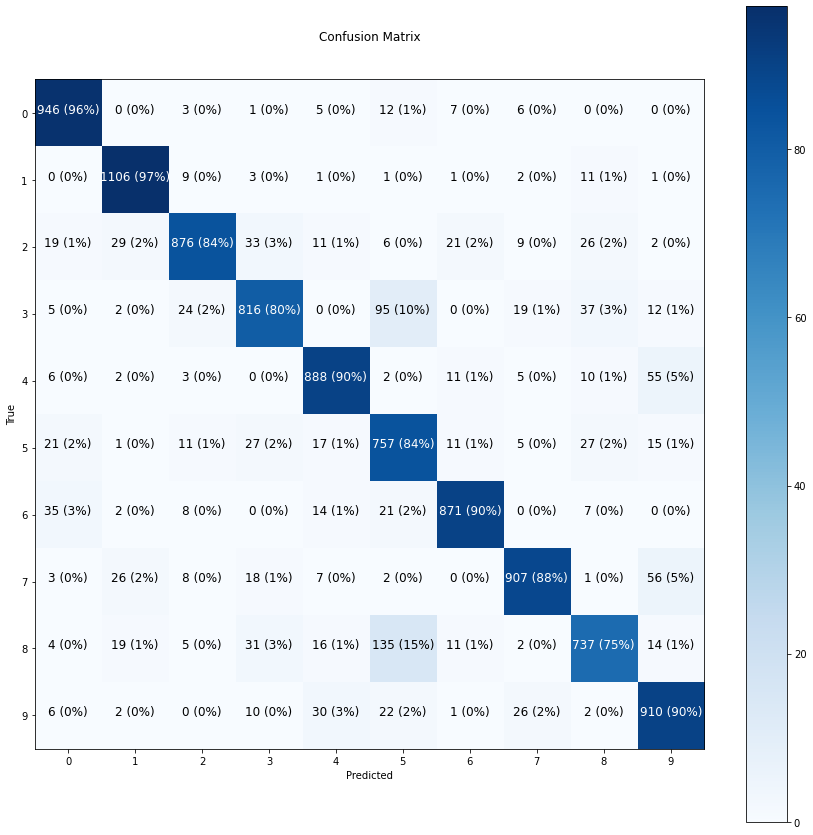

In [67]:
import itertools
fig, ax = plt.subplots(figsize=(15, 15))
cax = ax.matshow(cm_perc, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set(title="Confusion Matrix",
       xlabel="Predicted",
       ylabel="True",
       xticks=np.arange(0, 10),
       yticks=np.arange(0, 10),
       xticklabels=np.arange(0, 10),
       yticklabels=np.arange(0, 10))

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

threshold = (cm.max() + cm.min()) / 2.
for i, j in itertools.product(range(cm_perc.shape[0]), range(cm_perc.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_perc[i, j]}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=12)